In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

path = '/mnt/d/Documents/summary_avg_rattlesnakes.csv'
df = pd.read_csv(path, index_col=0)
df.head()

,Study_Site,Experiment,Year,Month,Day,Avg_Rattlesnakes,Avg_Krats,Avg_Rattlesnakes_Density,Avg_Krats_Density,Avg_Rattlesnakes_Active,Avg_Krats_Active
0,Canada,0,2000,6,1,300.000000,3003.908333,0.750000,7.510167,124.833333,625.900000
1,Canada,0,2000,6,2,299.891667,3005.933333,0.750000,7.515000,121.466667,685.966667
2,Canada,0,2000,6,3,300.466667,3007.525000,0.750417,7.519083,129.716667,685.675000
3,Canada,0,2000,6,4,301.341667,3009.216667,0.752917,7.521917,131.525000,689.550000
4,Canada,0,2000,6,5,301.508333,3007.258333,0.754250,7.518500,122.983333,688.491667


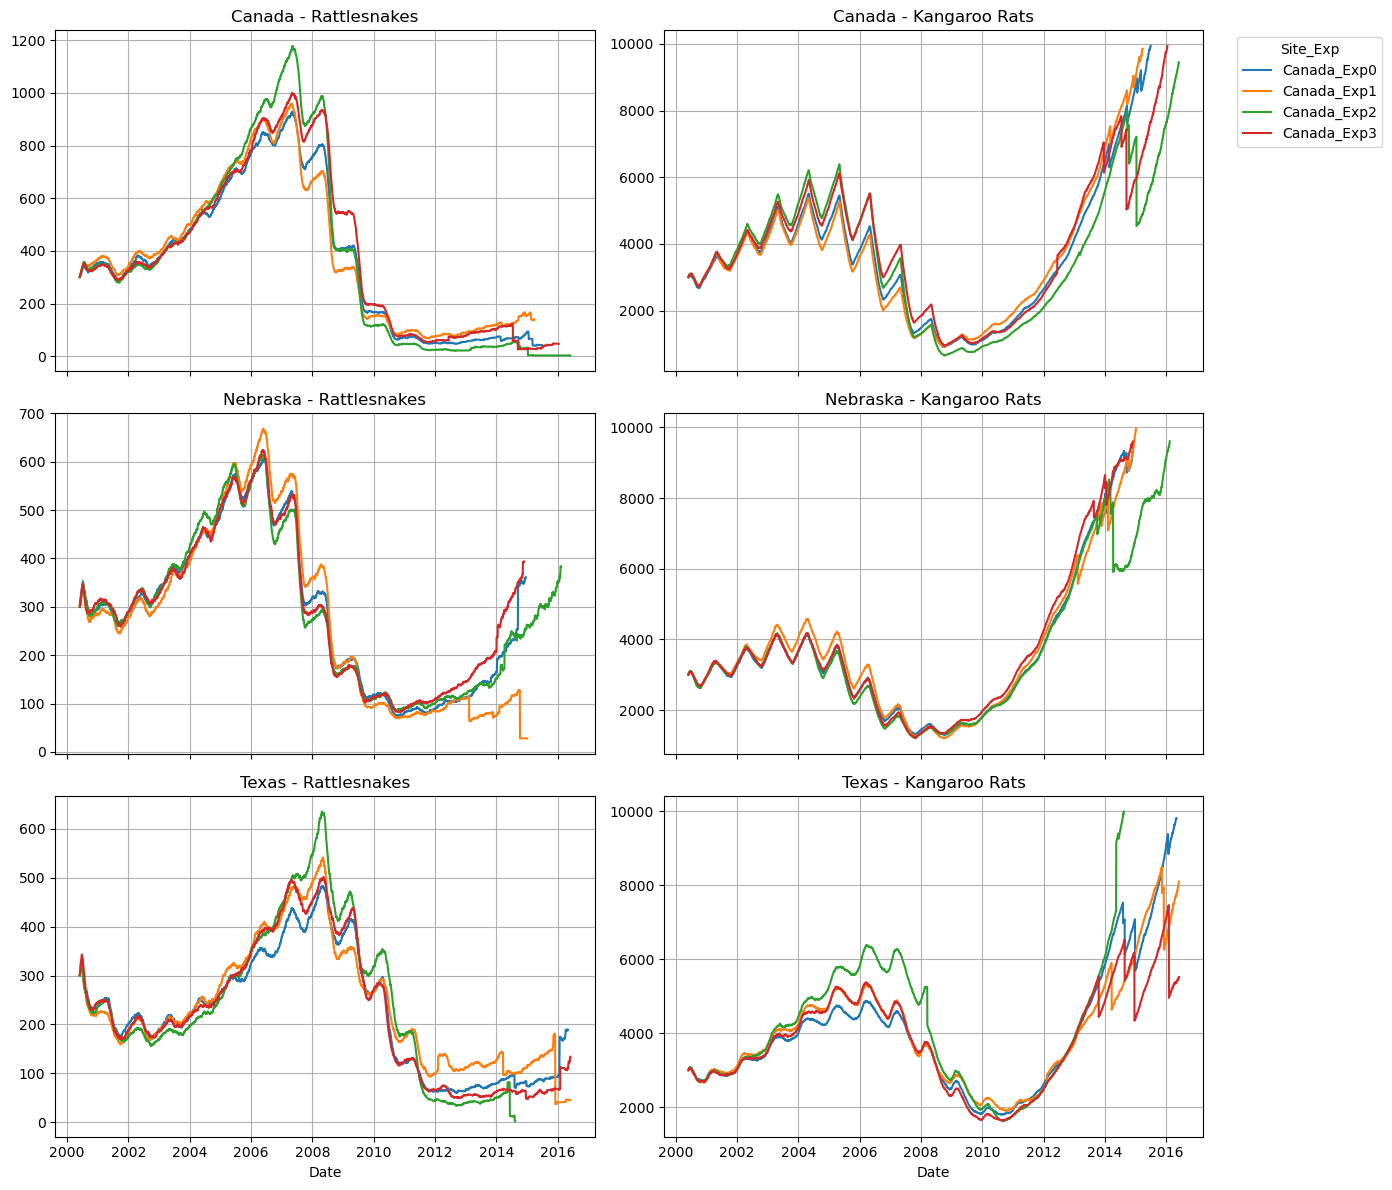

In [3]:
import matplotlib.pyplot as plt

# Ensure Date and Site_Exp columns are correct
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df['Site_Exp'] = df['Study_Site'] + '_Exp' + df['Experiment'].astype(str)
df = df.sort_values(by='Date')

# Unique study sites
sites = df['Study_Site'].unique()

# Create 2x3 grid of subplots (3 rows, 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12), sharex=True)

# Loop over sites and plot in left (rattlesnakes) and right (krats) columns
for i, site in enumerate(sites):
    site_df = df[df['Study_Site'] == site]

    # Left column: Avg_Rattlesnakes
    ax_left = axes[i, 0]
    for key, group in site_df.groupby('Site_Exp'):
        ax_left.plot(group['Date'], group['Avg_Rattlesnakes'], label=key)
    ax_left.set_title(f"{site} - Rattlesnakes")
    ax_left.grid(True)
    if i == len(sites) - 1:
        ax_left.set_xlabel('Date')

    # Right column: Avg_Krats
    ax_right = axes[i, 1]
    for key, group in site_df.groupby('Site_Exp'):
        ax_right.plot(group['Date'], group['Avg_Krats'], label=key)
    ax_right.set_title(f"{site} - Kangaroo Rats")
    ax_right.grid(True)
    if i == len(sites) - 1:
        ax_right.set_xlabel('Date')

# Add legend to the top-left plot only (or customize per need)
axes[0, 1].legend(title='Site_Exp', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

